## Libraries:

In [369]:
#importing numpy, pandas, sklearn, pyplot, sqlalchemy 
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization
from sqlalchemy import create_engine # for open connection of SQL and python
import warnings

warnings.filterwarnings('ignore')
#openning postgre for houseprices table
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

Next, we load the data from the PostgreSQL database and print out some observations:

In [370]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


houses.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [371]:
#lets copy the file first
houses_c = houses.copy()

### Info: to find the nature of data:

In [372]:
houses_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

#### OBS:
Total number of rows is 1460 and 81 columns.

alley is missing 1369 attributes, which means it is missing more than 90% of attributes.

lotfrontage is missing 259 attributes.

masvnrtype and masvnrarea are missing 8 attributes which is really low and we can drop those rows.

bsmtqual, bsmtcond, bsntfintype1 are missing 37 rows, where bsmtexposure, bsntfintype2 missing 38 rows.

electrical missing only 1 row

garagetype, garageyrblt, garagefinish, garagequal, garagecond are missing 81 rows.

poolqc only got 7 nonnull object which means it is missing almost all the rows, maybe we can drop this column entirely.

fence missing 1179 rows, which is also alots of attribute we could use.

miscfeature got 54 non null object, rest is missing.

There are few features, which misses more than 60% of data that could be used, if we try to fillin those missing values, we might end up messing up the data and get wrong prediction. I will drop all those columns which are missing more than 60% of data.

dtypes are float, integers and object, as they should be.
only 924Kb memory used

Our target feature(salesprice) got no missing values.


In [373]:
#dropping all those columns with more than 80% missing vlaues
houses_c.drop(['alley', 'poolqc', 'fence', 'miscfeature', 'fireplacequ'], axis = 1, inplace = True)


In [374]:
houses_c.shape

(1460, 76)

## EDA: 
**Exploratory Data Analysis**:

### Data CLeaning:

Dropping all the rows of features lower than 10.

In [375]:
houses_c['electrical'].dropna(inplace=True)
houses_c['masvnrtype'].dropna(inplace=True)
houses_c['masvnrarea'].dropna(inplace=True)

In [376]:
#checking for null values in rest of other columns
houses_c.isnull().sum()

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
street             0
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
masvnrarea         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
                ... 
bsmtfullbath       0
bsmthalfbath       0
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
kitchenqual        0
totrmsabvgrd       0
functional         0
fireplaces         0
garagetype        81
garageyrblt       81
garagefinish      81
garagecars         0
garagearea         0
garagequal        81
garagecond   

OBS: We can see lots of missing values

Lets, fillin all the values using mean value of that feature.

In [377]:
#doing fillna, using mean to fillin numerical value, and mode to fillin categorical value

houses_c['lotfrontage'].fillna(houses_c['lotfrontage'].mean(), inplace=True)
houses_c['bsmtqual'].fillna(houses_c['bsmtqual'].mode()[0], inplace=True)
houses_c['bsmtcond'].fillna(houses_c['bsmtcond'].mode()[0], inplace=True)
houses_c['bsmtexposure'].fillna(houses_c['bsmtexposure'].mode()[0], inplace=True)
houses_c['bsmtfintype1'].fillna(houses_c['bsmtfintype1'].mode()[0], inplace=True)
houses_c['bsmtfintype2'].fillna(houses_c['bsmtfintype2'].mode()[0], inplace=True)
houses_c['garagetype'].fillna(houses_c['garagetype'].mode()[0], inplace=True)
houses_c['garageyrblt'].fillna(houses_c['garageyrblt'].mode()[0], inplace=True)
houses_c['garagefinish'].fillna(houses_c['garagefinish'].mode()[0], inplace=True)
houses_c['garagequal'].fillna(houses_c['garagequal'].mode()[0], inplace=True)
houses_c['garagecond'].fillna(houses_c['garagecond'].mode()[0], inplace=True)


#### Decription of all the columns:

Data fields
Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access

**Alley**: Type of alley access

**LotShape**: General shape of property

**LandContour**: Flatness of the property

**Utilities**: Type of utilities available

**LotConfig**: Lot configuration

**LandSlope**: Slope of property

**Neighborhood**: Physical locations within Ames city limits

**Condition1**: Proximity to main road or railroad

**Condition2**: Proximity to main road or railroad (if a second is present)

**BldgType**: Type of dwelling

**HouseStyle**: Style of dwelling

**OverallQual**: Overall material and finish quality

**OverallCond**: Overall condition rating

**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date

**RoofStyle**: Type of roof

**RoofMatl**: Roof material

**Exterior1st**: Exterior covering on house

**Exterior2nd**: Exterior covering on house (if more than one material)

**MasVnrType**: Masonry veneer type

**MasVnrArea**: Masonry veneer area in square feet

**ExterQual**: Exterior material quality

**ExterCond**: Present condition of the material on the exterior

**Foundation**: Type of foundation

**BsmtQual**: Height of the basement

**BsmtCond**: General condition of the basement

**BsmtExposure**: Walkout or garden level basement walls

**BsmtFinType1**: Quality of basement finished area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2**: Quality of second finished area (if present)

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating**: Type of heating

**HeatingQC**: Heating quality and condition

**CentralAir**: Central air conditioning

**Electrical**: Electrical system

**1stFlrSF**: First Floor square feet

**2ndFlrSF**: Second floor square feet

**LowQualFinSF**: Low quality finished square feet (all floors)

**GrLivArea**: Above grade (ground) living area square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual**: Kitchen quality

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality rating

**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

**GarageCond**: Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF** : Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**PoolQC**: Pool quality

**Fence**: Fence quality

**MiscFeature**: Miscellaneous feature not covered in other categories

**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold

**YrSold**: Year Sold

**SaleType**: Type of sale

**SaleCondition**: Condition of sale

### Describing all the descriptive statictics:

In [378]:
houses_c.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### OBS:


In [379]:
#or can use function to find
cols = houses_c[['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
              'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 
              'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 
              'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical',
              'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
              'paveddrive', 'saletype', 'salecondition']]
for column in cols:
    print("--Unique values in column {} are:\n {}, \n unique number is : {}, \n value count is: \n{}"
          .format(column, houses_c[column].unique(), houses_c[column].nunique(), houses_c[column].value_counts()))
    print('Null:{}' .format(houses_c[column].isnull().sum()))

--Unique values in column mszoning are:
 ['RL' 'RM' 'C (all)' 'FV' 'RH'], 
 unique number is : 5, 
 value count is: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
Null:0
--Unique values in column street are:
 ['Pave' 'Grvl'], 
 unique number is : 2, 
 value count is: 
Pave    1454
Grvl       6
Name: street, dtype: int64
Null:0
--Unique values in column lotshape are:
 ['Reg' 'IR1' 'IR2' 'IR3'], 
 unique number is : 4, 
 value count is: 
Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64
Null:0
--Unique values in column landcontour are:
 ['Lvl' 'Bnk' 'Low' 'HLS'], 
 unique number is : 4, 
 value count is: 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64
Null:0
--Unique values in column utilities are:
 ['AllPub' 'NoSeWa'], 
 unique number is : 2, 
 value count is: 
AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64
Null:0
--Unique values in column lotconfig are:
 [

#### OBS:
MSZoning: Identifies the general zoning classification of the sale.
		
       C	Commercial
       FV	Floating Village Residential
       RH	Residential High Density
       RL	Residential Low Density 
       RM	Residential Medium Density

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	    Normal	
       RRNn  	Within 200' of North-South Railroad
       RRAn	    Adjacent to North-South Railroad
       PosN	    Near positive off-site feature--park, greenbelt, etc.
       PosA	    Adjacent to postive off-site feature
       RRNe	    Within 200' of East-West Railroad
       RRAe	    Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	    Normal	
       RRNn	    Within 200' of North-South Railroad
       RRAn	    Adjacent to North-South Railroad
       PosN	    Near positive off-site feature--park, greenbelt, etc.
       PosA	    Adjacent to postive off-site feature
       RRNe     Within 200' of East-West Railroad
       RRAe	    Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	    Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	    Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	    Slab
       Stone	Stone
       Wood	    Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	    Gas forced warm air furnace
       GasW	    Gas hot water or steam heat
       Grav	    Gravity furnace	
       OthW	    Hot water or steam heat other than gas
       Wall	    Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	    Mixed
		

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
	

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
	

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	    Good Wood
       MnWw	    Minimum Wood/Wire
       NA	    No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Saletype: Unique value is 


       WD: Warranty Deed - Conventional,
       CWD: Warranty Deed - Cash,
       New: Home just constructed and sold,
       COD: Court Officer Deed/Estate,
       Con: Contract 15% Down payment regular terms,
       ConLw: Contract Low Down payment and low interest,
       ConLI: Contract Low Interest,
       ConLD: Contract Low Down,
       Oth: Other.
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


### Data Exploration:

Lets explore the distribution of target feature which is saleprice.

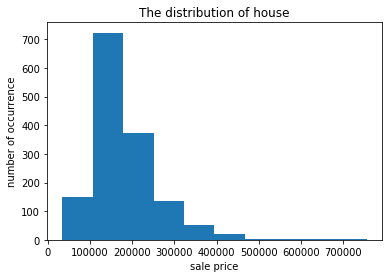

In [380]:
#plottinf figure
plt.hist(houses_c.saleprice)
plt.title("The distribution of house")
plt.xlabel("sale price")
plt.ylabel("number of occurrence")
plt.show()

skewed little to the right, more people are paying lesser than higher amount, and it could be because of place, type, and features.

Before looking at correlation let me bring saleprice to the first.

In [381]:
houses_c = houses_c[['saleprice','id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 
                     'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 
                     'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 
                     'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 
                     'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 
                     'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 
                     'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 
                     'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 
                     'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 
                     'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
                     'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 
                     'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish', 
                     'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 
                     'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 
                     'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saletype', 
                     'salecondition']]

In [382]:
houses_c.corr()

,saleprice,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,...,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold
saleprice,1.000000,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923
id,-0.021917,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
mssubclass,-0.084284,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
lotfrontage,0.334901,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179700,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
lotarea,0.263843,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
overallqual,0.790982,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
overallcond,-0.077856,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
yearbuilt,0.522897,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
yearremodadd,0.507101,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
masvnrarea,0.477493,-0.050298,0.022936,0.179700,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201


OBS:
saleprice is highly correlated to **overallqual, totalbsmtsf, firstflrsf, grlivarea, garagecars, garagearea**, So saleprice is highly depended on overall quality of house, total basement squarefoot, first floor square feet, ground living area sq feet, garage's cara capacity, garage's area in sq ft. Saleprice is also depended on other features but not highly, but may be if some features added together gives high correlation to saleprice.	

Lets Visualize correlation using sns:

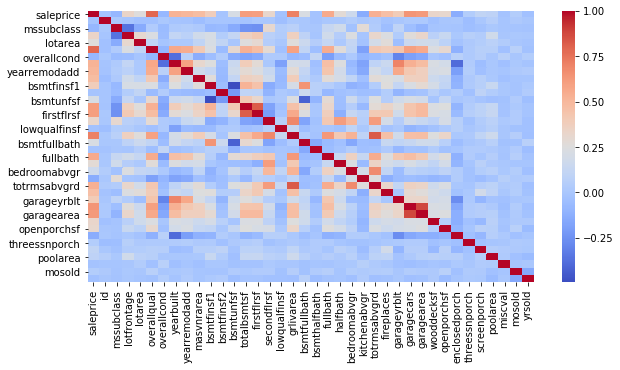

In [383]:
#plotting sns figure for correlation
plt.figure(figsize=(10,5))
sns.heatmap(houses_c.corr(),cmap='coolwarm')

#### Visualization of relation of each features to saleprice:

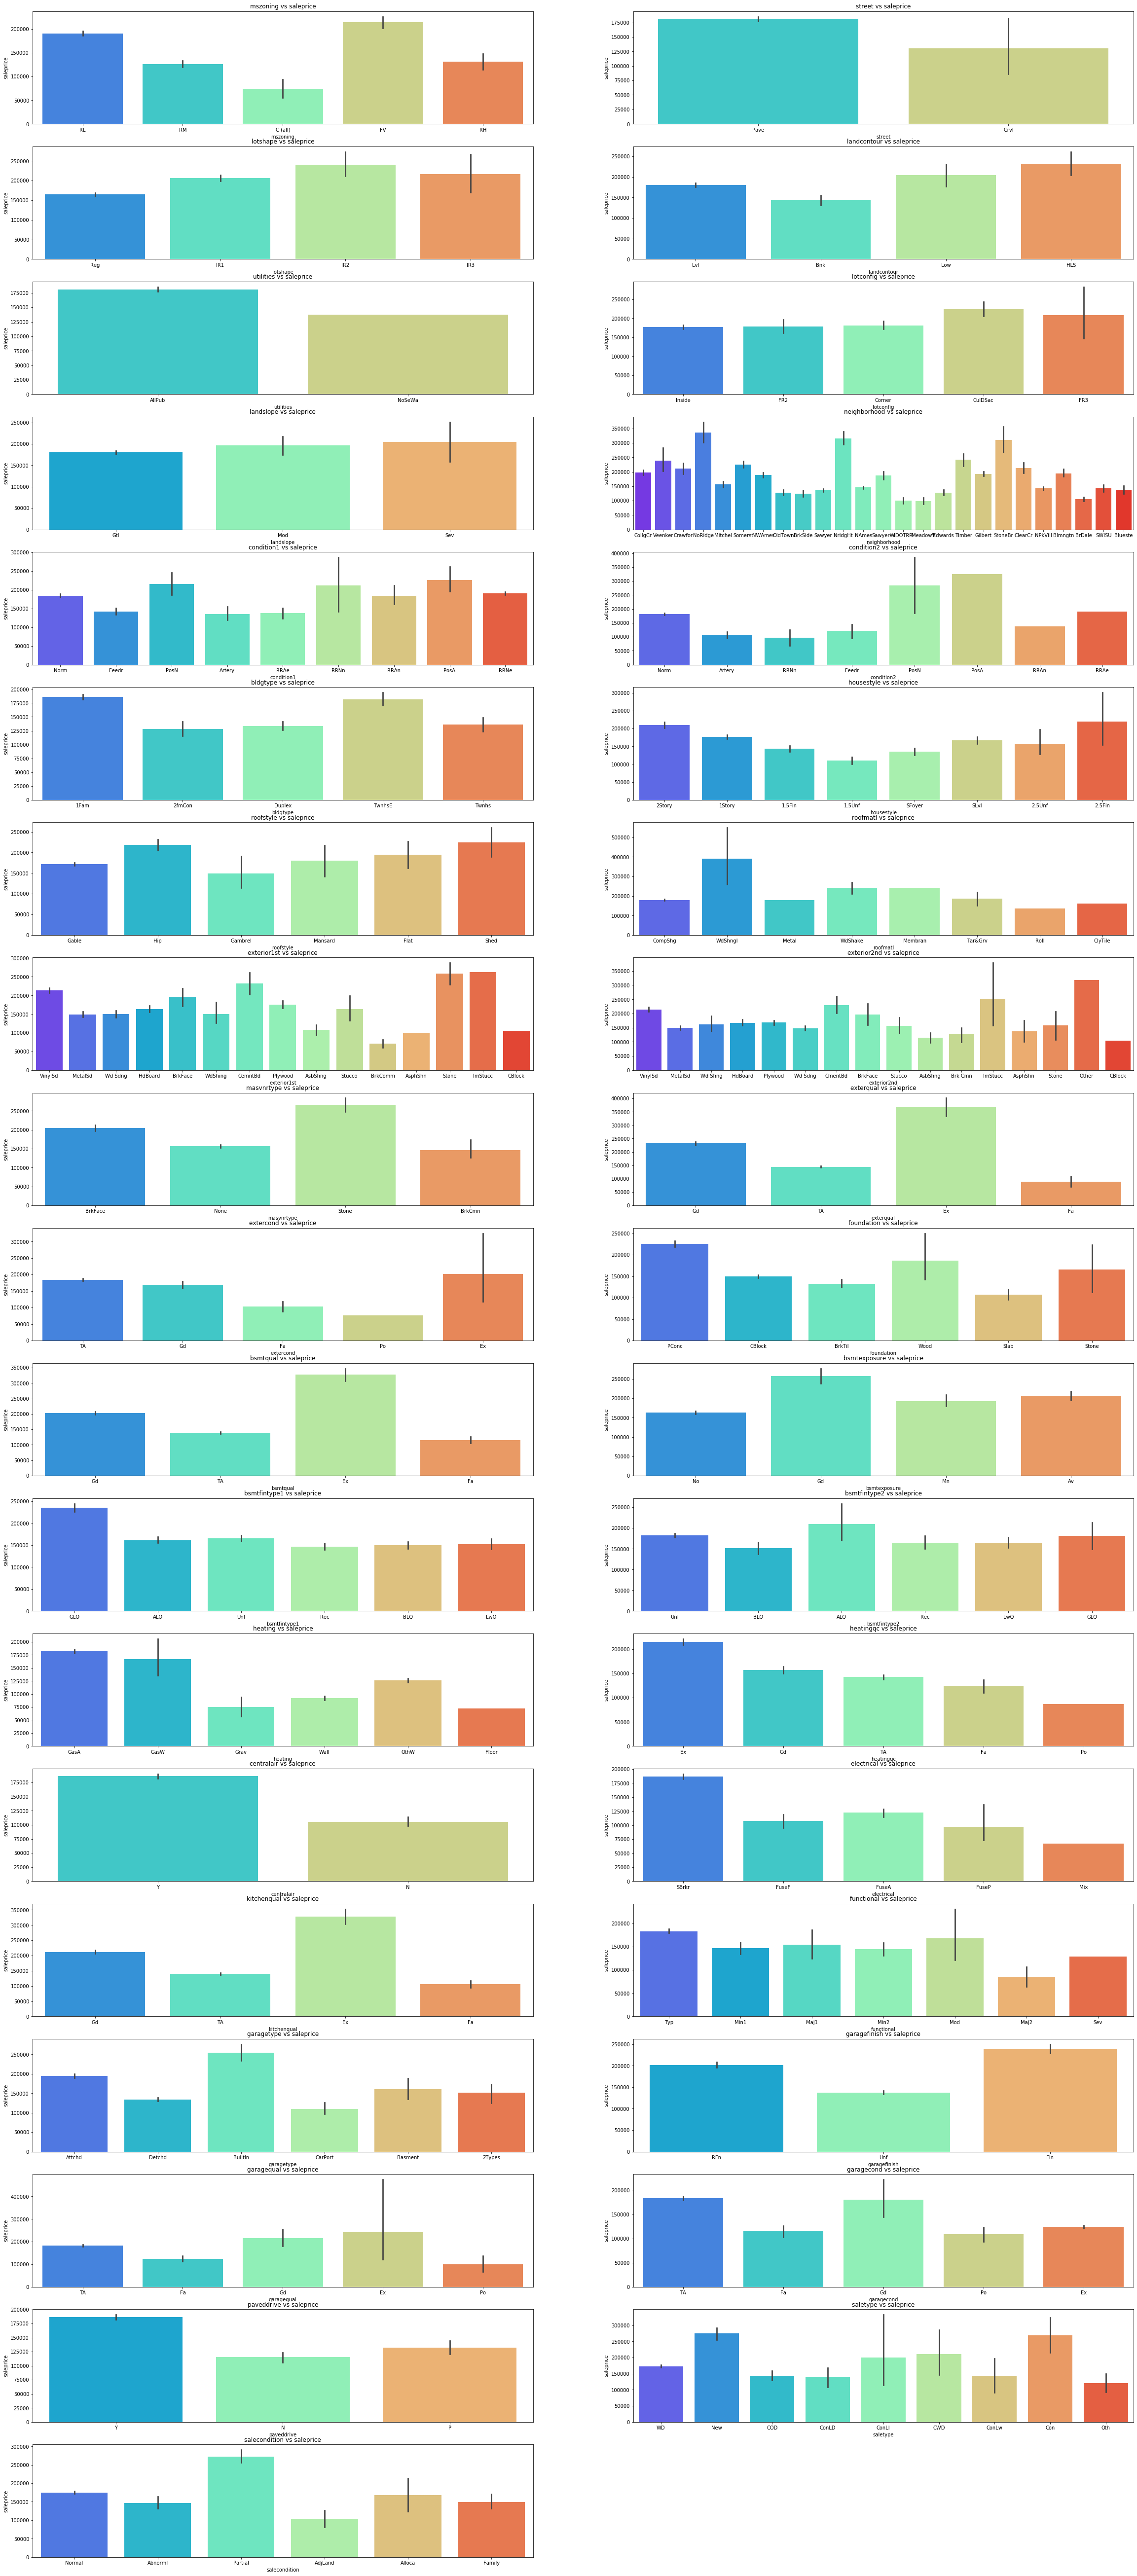

In [384]:
#finding ground relation of each features to target using histogram

plt.figure(figsize=(40,100))

plt.subplot(20,2,1)
sns.barplot(houses_c['mszoning'], houses_c['saleprice'], palette='rainbow')
plt.title("mszoning vs saleprice")

plt.subplot(20,2,2)
sns.barplot(houses_c['street'], houses_c['saleprice'], palette='rainbow')
plt.title("street vs saleprice")


plt.subplot(20,2,3)
sns.barplot(houses_c['lotshape'], houses_c['saleprice'], palette='rainbow')
plt.title("lotshape vs saleprice")


plt.subplot(20,2,4)
sns.barplot(houses_c['landcontour'], houses_c['saleprice'], palette='rainbow')
plt.title("landcontour vs saleprice")


plt.subplot(20,2,5)
sns.barplot(houses_c['utilities'], houses_c['saleprice'], palette='rainbow')
plt.title("utilities vs saleprice")

plt.subplot(20,2,6)
sns.barplot(houses_c['lotconfig'], houses_c['saleprice'], palette='rainbow')
plt.title("lotconfig vs saleprice")

plt.subplot(20,2,7)
sns.barplot(houses_c['landslope'], houses_c['saleprice'], palette='rainbow')
plt.title("landslope vs saleprice")


plt.subplot(20,2,8)
sns.barplot(houses_c['neighborhood'], houses_c['saleprice'], palette='rainbow')
plt.title("neighborhood vs saleprice")


plt.subplot(20,2,9)
sns.barplot(houses_c['condition1'], houses_c['saleprice'], palette='rainbow')
plt.title("condition1 vs saleprice")

plt.subplot(20,2,10)
sns.barplot(houses_c['condition2'], houses_c['saleprice'], palette='rainbow')
plt.title("condition2 vs saleprice")


plt.subplot(20,2,11)
sns.barplot(houses_c['bldgtype'], houses_c['saleprice'], palette='rainbow')
plt.title("bldgtype vs saleprice")

plt.subplot(20,2,12)
sns.barplot(houses_c['housestyle'], houses_c['saleprice'], palette='rainbow')
plt.title("housestyle vs saleprice")


plt.subplot(20,2,13)
sns.barplot(houses_c['roofstyle'], houses_c['saleprice'], palette='rainbow')
plt.title("roofstyle vs saleprice")


plt.subplot(20,2,14)
sns.barplot(houses_c['roofmatl'], houses_c['saleprice'], palette='rainbow')
plt.title("roofmatl vs saleprice")


plt.subplot(20,2,15)
sns.barplot(houses_c['exterior1st'], houses_c['saleprice'], palette='rainbow')
plt.title("exterior1st vs saleprice")

plt.subplot(20,2,16)
sns.barplot(houses_c['exterior2nd'], houses_c['saleprice'], palette='rainbow')
plt.title("exterior2nd vs saleprice")

plt.subplot(20,2,17)
sns.barplot(houses_c['masvnrtype'], houses_c['saleprice'], palette='rainbow')
plt.title("masvnrtype vs saleprice")

plt.subplot(20,2,18)
sns.barplot(houses_c['exterqual'], houses_c['saleprice'], palette='rainbow')
plt.title("exterqual vs saleprice")

plt.subplot(20,2,19)
sns.barplot(houses_c['extercond'], houses_c['saleprice'], palette='rainbow')
plt.title("extercond vs saleprice")

plt.subplot(20,2,20)
sns.barplot(houses_c['foundation'], houses_c['saleprice'], palette='rainbow')
plt.title("foundation vs saleprice")

plt.subplot(20,2,21)
sns.barplot(houses_c['bsmtqual'], houses_c['saleprice'], palette='rainbow')
plt.title("bsmtqual vs saleprice")

plt.subplot(20,2,22)
sns.barplot(houses_c['bsmtexposure'], houses_c['saleprice'], palette='rainbow')
plt.title("bsmtexposure vs saleprice")

plt.subplot(20,2,23)
sns.barplot(houses_c['bsmtfintype1'], houses_c['saleprice'], palette='rainbow')
plt.title("bsmtfintype1 vs saleprice")

plt.subplot(20,2,24)
sns.barplot(houses_c['bsmtfintype2'], houses_c['saleprice'], palette='rainbow')
plt.title("bsmtfintype2 vs saleprice")

plt.subplot(20,2,25)
sns.barplot(houses_c['heating'], houses_c['saleprice'], palette='rainbow')
plt.title("heating vs saleprice")

plt.subplot(20,2,26)
sns.barplot(houses_c['heatingqc'], houses_c['saleprice'], palette='rainbow')
plt.title("heatingqc vs saleprice")

plt.subplot(20,2,27)
sns.barplot(houses_c['centralair'], houses_c['saleprice'], palette='rainbow')
plt.title("centralair vs saleprice")

plt.subplot(20,2,28)
sns.barplot(houses_c['electrical'], houses_c['saleprice'], palette='rainbow')
plt.title("electrical vs saleprice")

plt.subplot(20,2,29)
sns.barplot(houses_c['kitchenqual'], houses_c['saleprice'], palette='rainbow')
plt.title("kitchenqual vs saleprice")


plt.subplot(20,2,30)
sns.barplot(houses_c['functional'], houses_c['saleprice'], palette='rainbow')
plt.title("functional vs saleprice")

plt.subplot(20,2,31)
sns.barplot(houses_c['garagetype'], houses_c['saleprice'], palette='rainbow')
plt.title("garagetype vs saleprice")

plt.subplot(20,2,32)
sns.barplot(houses_c['garagefinish'], houses_c['saleprice'], palette='rainbow')
plt.title("garagefinish vs saleprice")

plt.subplot(20,2,33)
sns.barplot(houses_c['garagequal'], houses_c['saleprice'], palette='rainbow')
plt.title("garagequal vs saleprice")

plt.subplot(20,2,34)
sns.barplot(houses_c['garagecond'], houses_c['saleprice'], palette='rainbow')
plt.title("garagecond vs saleprice")

plt.subplot(20,2,35)
sns.barplot(houses_c['paveddrive'], houses_c['saleprice'], palette='rainbow')
plt.title("paveddrive vs saleprice")

plt.subplot(20,2,36)
sns.barplot(houses_c['saletype'], houses_c['saleprice'], palette='rainbow')
plt.title("saletype vs saleprice")

plt.subplot(20,2,37)
sns.barplot(houses_c['salecondition'], houses_c['saleprice'], palette='rainbow')
plt.title("salecondition vs saleprice")

plt.show()


OBS:
Mszoning: higher saleprice for floating Village Residential, and then Residential low density, and commercial has lowest saleprice than others.

Street: Paved one has higher sale price than grvl.

Lotshape: IR2 moderatly irreguar has higher saleprice, regualr lotshape has lowest saleprice than others.

Landcontour: HLS hills one has higher saleprice, and Banked one got lowest saleprice.

Utilitie: AllPub has higher saleprice and NoSeWa got the lowest sale price.

Lotconfig: CulDSac has higher saleprice and Inside one got the lowest saleprice.

need to write more:

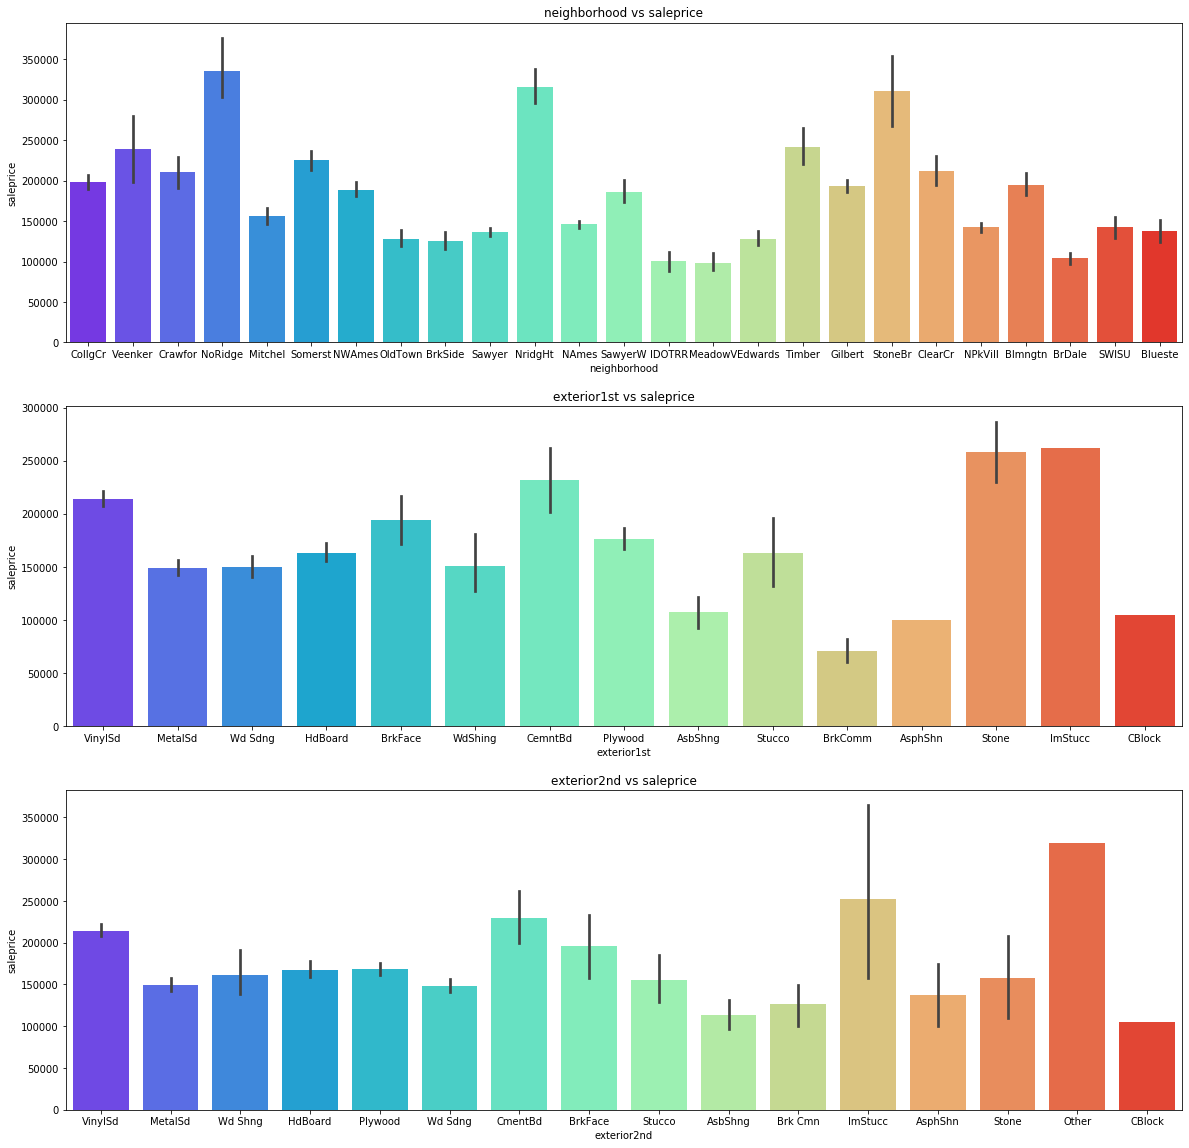

In [385]:
#plotting visualization for neighbourhood, exterior1st and 2nd for clear vision
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
sns.barplot(houses_c['neighborhood'], houses_c['saleprice'], palette='rainbow')
plt.title("neighborhood vs saleprice")

plt.subplot(3,1,2)
sns.barplot(houses_c['exterior1st'], houses_c['saleprice'], palette='rainbow')
plt.title("exterior1st vs saleprice")

plt.subplot(3,1,3)
sns.barplot(houses_c['exterior2nd'], houses_c['saleprice'], palette='rainbow')
plt.title("exterior2nd vs saleprice")

plt.show()


OBS:

NoRidge got higher saleprice, whereas Meadow got the lowest saleprice among the neighbourhood.

ImStucc(Imitation Stucco) got higher saleprice, whereas, BrkComm(Brick common) got the lowest saleprice for the 1st exterior covering material.

Other got higher saleprice and then ImStucc(Imitation Stucco), and  AsbShng( Asbestos Shingles) got the lowest saleprice for the 2nd exterior covering material.

Lets do scatter plot to see visualization of numerical features:

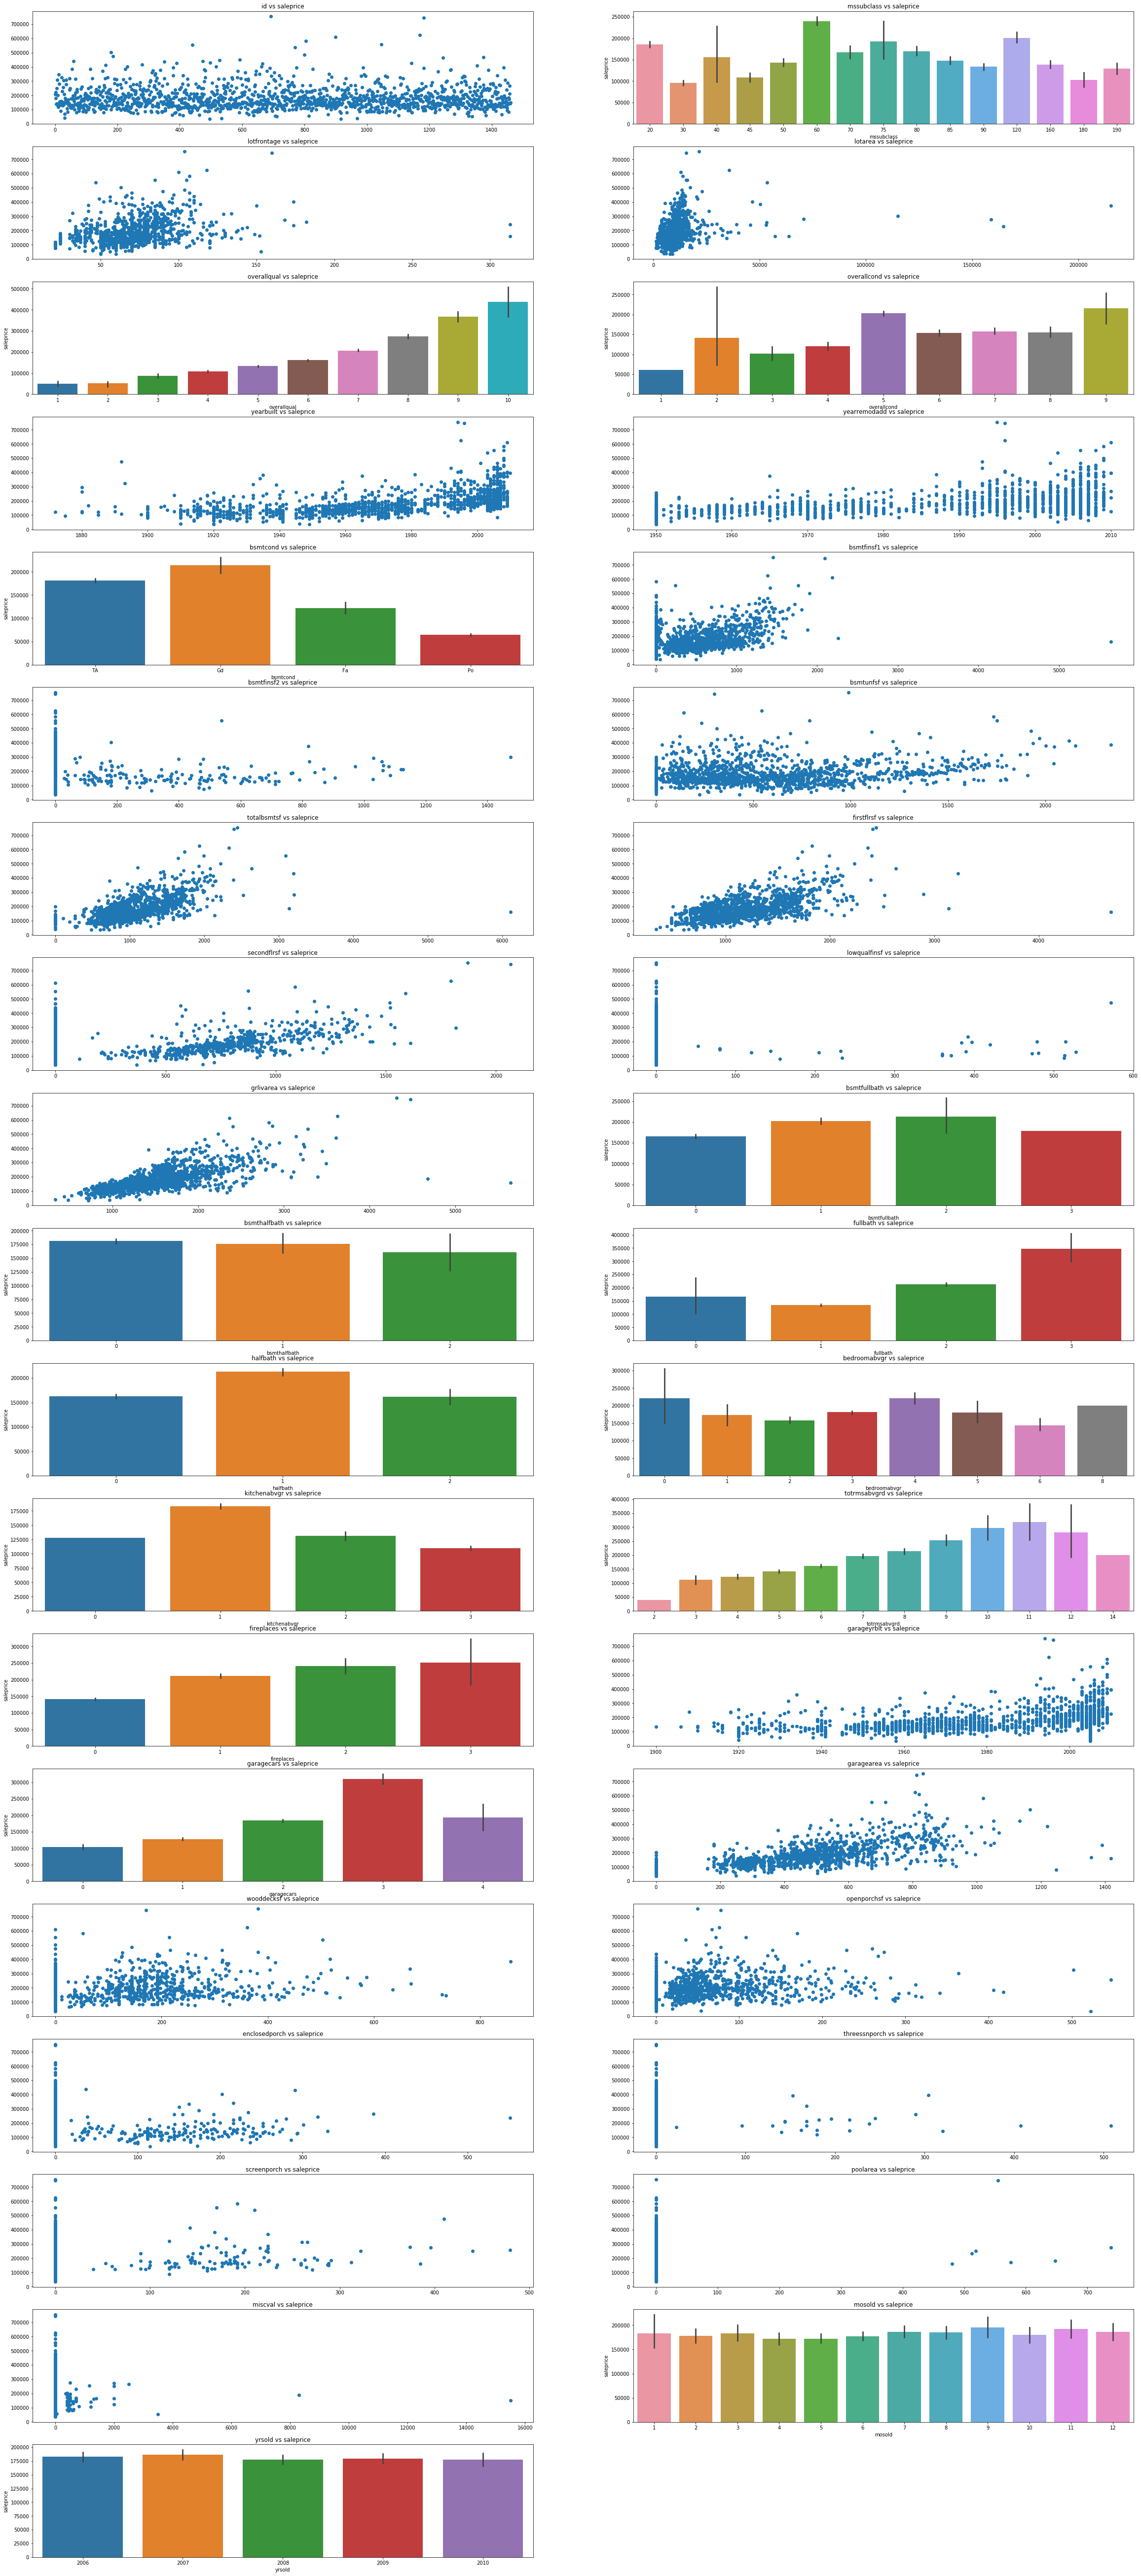

In [386]:
#finding ground relation of each features to target using scatter plot

plt.figure(figsize=(40,100))

plt.subplot(20,2,1)
plt.scatter(houses_c["id"], houses_c["saleprice"])
plt.title("id vs saleprice")


plt.subplot(20,2,2)
sns.barplot(houses_c["mssubclass"], houses_c["saleprice"])
plt.title("mssubclass vs saleprice")

plt.subplot(20,2,3)
plt.scatter(houses_c["lotfrontage"], houses_c["saleprice"])
plt.title("lotfrontage vs saleprice")


plt.subplot(20,2,4)
plt.scatter(houses_c["lotarea"], houses_c["saleprice"])
plt.title("lotarea vs saleprice")

plt.subplot(20,2,5)
sns.barplot(houses_c["overallqual"], houses_c["saleprice"])
plt.title("overallqual vs saleprice")

plt.subplot(20,2,6)
sns.barplot(houses_c["overallcond"], houses_c["saleprice"])
plt.title("overallcond vs saleprice")

plt.subplot(20,2,7)
plt.scatter(houses_c["yearbuilt"], houses_c["saleprice"])
plt.title("yearbuilt vs saleprice")


plt.subplot(20,2,8)
plt.scatter(houses_c["yearremodadd"], houses_c["saleprice"])
plt.title("yearremodadd vs saleprice")


plt.subplot(20,2,9)
sns.barplot(houses_c["bsmtcond"], houses_c["saleprice"])
plt.title("bsmtcond vs saleprice")

plt.subplot(20,2,10)
plt.scatter(houses_c["bsmtfinsf1"], houses_c["saleprice"])
plt.title("bsmtfinsf1 vs saleprice")


plt.subplot(20,2,11)
plt.scatter(houses_c["bsmtfinsf2"], houses_c["saleprice"])
plt.title("bsmtfinsf2 vs saleprice")

plt.subplot(20,2,12)
plt.scatter(houses_c["bsmtunfsf"], houses_c["saleprice"])
plt.title("bsmtunfsf vs saleprice")

plt.subplot(20,2,13)
plt.scatter(houses_c["totalbsmtsf"], houses_c["saleprice"])
plt.title("totalbsmtsf vs saleprice")

plt.subplot(20,2,14)
plt.scatter(houses_c["firstflrsf"], houses_c["saleprice"])
plt.title("firstflrsf vs saleprice")


plt.subplot(20,2,15)
plt.scatter(houses_c["secondflrsf"], houses_c["saleprice"])
plt.title("secondflrsf vs saleprice")

plt.subplot(20,2,16)
plt.scatter(houses_c["lowqualfinsf"], houses_c["saleprice"])
plt.title("lowqualfinsf vs saleprice")

plt.subplot(20,2,17)
plt.scatter(houses_c["grlivarea"], houses_c["saleprice"])
plt.title("grlivarea vs saleprice")

plt.subplot(20,2,18)
sns.barplot(houses_c["bsmtfullbath"], houses_c["saleprice"])
plt.title("bsmtfullbath vs saleprice")

plt.subplot(20,2,19)
sns.barplot(houses_c["bsmthalfbath"], houses_c["saleprice"])
plt.title("bsmthalfbath vs saleprice")

plt.subplot(20,2,20)
sns.barplot(houses_c["fullbath"], houses_c["saleprice"])
plt.title("fullbath vs saleprice")

plt.subplot(20,2,21)
sns.barplot(houses_c["halfbath"], houses_c["saleprice"])
plt.title("halfbath vs saleprice")

plt.subplot(20,2,22)
sns.barplot(houses_c["bedroomabvgr"], houses_c["saleprice"])
plt.title("bedroomabvgr vs saleprice")

plt.subplot(20,2,23)
sns.barplot(houses_c["kitchenabvgr"], houses_c["saleprice"])
plt.title("kitchenabvgr vs saleprice")

plt.subplot(20,2,24)
sns.barplot(houses_c["totrmsabvgrd"], houses_c["saleprice"])
plt.title("totrmsabvgrd vs saleprice")

plt.subplot(20,2,25)
sns.barplot(houses_c["fireplaces"], houses_c["saleprice"])
plt.title("fireplaces vs saleprice")

plt.subplot(20,2,26)
plt.scatter(houses_c["garageyrblt"], houses_c["saleprice"])
plt.title("garageyrblt vs saleprice")

plt.subplot(20,2,27)
sns.barplot(houses_c["garagecars"], houses_c["saleprice"])
plt.title("garagecars vs saleprice")

plt.subplot(20,2,28)
plt.scatter(houses_c["garagearea"], houses_c["saleprice"])
plt.title("garagearea vs saleprice")

plt.subplot(20,2,29)
plt.scatter(houses_c["wooddecksf"], houses_c["saleprice"])
plt.title("wooddecksf vs saleprice")


plt.subplot(20,2,30)
plt.scatter(houses_c["openporchsf"], houses_c["saleprice"])
plt.title("openporchsf vs saleprice")

plt.subplot(20,2,31)
plt.scatter(houses_c["enclosedporch"], houses_c["saleprice"])
plt.title("enclosedporch vs saleprice")

plt.subplot(20,2,32)
plt.scatter(houses_c["threessnporch"], houses_c["saleprice"])
plt.title("threessnporch vs saleprice")

plt.subplot(20,2,33)
plt.scatter(houses_c["screenporch"], houses_c["saleprice"])
plt.title("screenporch vs saleprice")

plt.subplot(20,2,34)
plt.scatter(houses_c["poolarea"], houses_c["saleprice"])
plt.title("poolarea vs saleprice")

plt.subplot(20,2,35)
plt.scatter(houses_c["miscval"], houses_c["saleprice"])
plt.title("miscval vs saleprice")

plt.subplot(20,2,36)
sns.barplot(houses_c["mosold"], houses_c["saleprice"])
plt.title("mosold vs saleprice")

plt.subplot(20,2,37)
sns.barplot(houses_c["yrsold"], houses_c["saleprice"])
plt.title("yrsold vs saleprice")

plt.show()


OBS:

### Feature Engineering:

#### one hot-coding, through dummies.

In [387]:
houses_c["is_Pave"] = pd.get_dummies(houses.street, drop_first=True)
houses_c["is_AllPub"] = pd.get_dummies(houses.utilities, drop_first=True)
houses_c["Y"] = pd.get_dummies(houses.centralair, drop_first=True)


In [388]:
dummy = pd.get_dummies(houses_c[['mszoning', 'lotshape', 'landcontour', 'lotconfig', 'landslope',
              'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 
              'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 
              'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'electrical',
              'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
              'paveddrive', 'saletype', 'salecondition']])
dummy.head()

,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [389]:
houses_c = pd.concat([houses_c, dummy], axis=1)
houses_c.head()

,saleprice,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,208500,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
1,181500,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
2,223500,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0
3,140000,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,0,0,0,1,1,0,0,0,0,0
4,250000,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,0,1,0


### Feature Selection:

#### Correlation matrix:
checking for correlation of all the features

In [390]:
houses_c1 = houses_c[['saleprice', 'id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 
                      'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 
                      'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 
                      'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 
                      'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation']]
houses_c2 = houses_c[['saleprice', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 
                      'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 
                      'centralair', 'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 
                      'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
                      'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype', 'garageyrblt', 
                      'garagefinish']]
houses_c3 = houses_c[['saleprice', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 
                      'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 
                      'miscval', 'mosold', 'yrsold', 'saletype', 'salecondition', 'is_Pave', 'is_AllPub', 'Y', 
                      'mszoning_C (all)', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM', 'lotshape_IR1', 
                      'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg', 'landcontour_Bnk']]
houses_c4 = houses_c[['saleprice', 'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'lotconfig_Corner', 
                      'lotconfig_CulDSac', 'lotconfig_FR2', 'lotconfig_FR3', 'lotconfig_Inside', 'landslope_Gtl', 
                      'landslope_Mod', 
                      'landslope_Sev', 'neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 
                      'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 
                      'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_IDOTRR', 'neighborhood_MeadowV',
                      'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 
                      'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown']]

In [391]:
houses_c5 = houses_c[['saleprice', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 
                      'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 
                      'neighborhood_Veenker', 'condition1_Artery', 'condition1_Feedr', 'condition1_Norm', 
                      'condition1_PosA', 'condition1_PosN', 'condition1_RRAe', 'condition1_RRAn', 'condition1_RRNe', 
                      'condition1_RRNn', 'condition2_Artery', 'condition2_Feedr', 'condition2_Norm', 
                      'condition2_PosA', 'condition2_PosN', 'condition2_RRAe', 'condition2_RRAn', 'condition2_RRNn', 
                      'bldgtype_1Fam', 'bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bldgtype_TwnhsE']]
houses_c6 = houses_c[['saleprice', 'housestyle_1.5Fin', 'housestyle_1.5Unf', 'housestyle_1Story', 
                      'housestyle_2.5Fin', 'housestyle_2.5Unf', 'housestyle_2Story', 'housestyle_SFoyer', 
                      'housestyle_SLvl', 'roofstyle_Flat', 'roofstyle_Gable', 'roofstyle_Gambrel', 'roofstyle_Hip', 
                      'roofstyle_Mansard', 'roofstyle_Shed', 'roofmatl_ClyTile', 'roofmatl_CompShg', 
                      'roofmatl_Membran', 'roofmatl_Metal', 'roofmatl_Roll', 'roofmatl_Tar&Grv', 'roofmatl_WdShake', 
                      'roofmatl_WdShngl', 'exterior1st_AsbShng', 'exterior1st_AsphShn', 'exterior1st_BrkComm', 
                      'exterior1st_BrkFace', 'exterior1st_CBlock', 'exterior1st_CemntBd', 'exterior1st_HdBoard']]
houses_c7 = houses_c[['saleprice', 'exterior1st_ImStucc', 'exterior1st_MetalSd', 'exterior1st_Plywood', 
                      'exterior1st_Stone', 'exterior1st_Stucco', 'exterior1st_VinylSd', 'exterior1st_Wd Sdng', 
                      'exterior1st_WdShing', 'exterior2nd_AsbShng', 'exterior2nd_AsphShn', 'exterior2nd_Brk Cmn', 
                      'exterior2nd_BrkFace', 'exterior2nd_CBlock', 'exterior2nd_CmentBd', 'exterior2nd_HdBoard', 
                      'exterior2nd_ImStucc', 'exterior2nd_MetalSd', 'exterior2nd_Other', 'exterior2nd_Plywood', 
                      'exterior2nd_Stone', 'exterior2nd_Stucco', 'exterior2nd_VinylSd', 'exterior2nd_Wd Sdng', 
                      'exterior2nd_Wd Shng', 'masvnrtype_BrkCmn', 'masvnrtype_BrkFace', 'masvnrtype_None', 
                      'masvnrtype_Stone', 'exterqual_Ex']]
houses_c8 = houses_c[['saleprice', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'extercond_Ex', 'extercond_Fa', 
                      'extercond_Gd', 'extercond_Po', 'extercond_TA', 'foundation_BrkTil', 'foundation_CBlock', 
                      'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood', 'bsmtqual_Ex', 
                      'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'bsmtexposure_Av', 'bsmtexposure_Gd', 
                      'bsmtexposure_Mn', 'bsmtexposure_No', 'bsmtfintype1_ALQ', 'bsmtfintype1_BLQ', 
                      'bsmtfintype1_GLQ', 'bsmtfintype1_LwQ', 'bsmtfintype1_Rec', 'bsmtfintype1_Unf', 
                      'bsmtfintype2_ALQ']]


In [392]:
houses_c9 = houses_c[['saleprice', 'bsmtfintype2_BLQ', 'bsmtfintype2_GLQ', 'bsmtfintype2_LwQ', 
                      'bsmtfintype2_Rec', 'bsmtfintype2_Unf', 'heating_Floor', 'heating_GasA', 
                      'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'heatingqc_Ex', 
                      'heatingqc_Fa', 'heatingqc_Gd', 'heatingqc_Po', 'heatingqc_TA', 'electrical_FuseA', 
                      'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr', 
                      'kitchenqual_Ex', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 'functional_Maj1', 
                      'functional_Maj2', 'functional_Min1', 'functional_Min2']]
houses_c10 = houses_c[['saleprice', 'functional_Mod', 'functional_Sev', 'functional_Typ', 'garagetype_2Types', 
                       'garagetype_Attchd', 'garagetype_Basment', 'garagetype_BuiltIn', 'garagetype_CarPort', 
                       'garagetype_Detchd', 'garagefinish_Fin', 'garagefinish_RFn', 'garagefinish_Unf', 
                       'garagequal_Ex', 'garagequal_Fa', 'garagequal_Gd', 'garagequal_Po', 'garagequal_TA', 
                       'garagecond_Ex', 'garagecond_Fa', 'garagecond_Gd', 'garagecond_Po', 'garagecond_TA', 
                       'paveddrive_N', 'paveddrive_P', 'paveddrive_Y', 'saletype_COD', 'saletype_CWD', 
                       'saletype_Con', 'saletype_ConLD']]
houses_c11 = houses_c[['saleprice', 'saletype_ConLI', 'saletype_ConLw', 'saletype_New', 'saletype_Oth', 
                       'saletype_WD', 'salecondition_Abnorml', 'salecondition_AdjLand', 'salecondition_Alloca', 
                       'salecondition_Family', 'salecondition_Normal', 'salecondition_Partial']]

In [393]:
houses_c1.corr() 

,saleprice,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea
saleprice,1.000000,-0.021917,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493
id,-0.021917,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298
mssubclass,-0.084284,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936
lotfrontage,0.334901,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179700
lotarea,0.263843,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160
overallqual,0.790982,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876
overallcond,-0.077856,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101
yearbuilt,0.522897,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707
yearremodadd,0.507101,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618
masvnrarea,0.477493,-0.050298,0.022936,0.179700,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000


OBS:
Correlation greater than 0.5 are:
- overallqual,  yearbuilt, yearremodadd.

In [394]:
houses_c2.corr() 


,saleprice,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt
saleprice,1.000000,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.397778
bsmtfinsf1,0.386420,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.119267
bsmtfinsf2,-0.011378,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.094208
bsmtunfsf,0.214479,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.172350
totalbsmtsf,0.613581,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.262945
firstflrsf,0.605852,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.182240
secondflrsf,0.319334,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.052291
lowqualfinsf,-0.025606,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,0.007298
grlivarea,0.708624,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.178186
bsmtfullbath,0.227122,0.649212,0.158678,-0.422900,0.307351,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.105716


OBS:
Correlation greater than 0.5 are:
- grlivarea, totalbsmtsf, firstflrsf, fullbath, totrmsabvgrd 


In [395]:
houses_c3.corr() 

,saleprice,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,...,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk
saleprice,1.000000,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,...,-0.111257,0.089950,-0.065429,0.245063,-0.288065,0.223284,0.126096,0.036720,-0.267672,-0.101124
garagecars,0.640409,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,...,-0.051927,0.102851,-0.090477,0.175167,-0.221834,0.161090,0.086285,0.037004,-0.193305,-0.109773
garagearea,0.623431,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,...,-0.016778,0.114859,-0.073188,0.169593,-0.235580,0.142028,0.065075,0.050986,-0.169803,-0.102019
wooddecksf,0.324413,0.226342,0.224666,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,...,-0.055969,-0.063687,-0.022364,0.167734,-0.135901,0.151257,0.063166,0.008322,-0.170862,-0.051234
openporchsf,0.315856,0.213569,0.241435,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,...,0.022243,0.185169,-0.029259,-0.044253,-0.053039,0.059189,0.062904,0.022493,-0.083247,-0.020540
enclosedporch,-0.128578,-0.151434,-0.121777,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,...,0.082295,-0.077563,0.063286,-0.159896,0.190614,-0.063458,-0.054768,-0.029840,0.085886,0.087880
threessnporch,0.044584,0.035765,0.035087,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,...,-0.009661,-0.025113,-0.012246,0.051525,-0.038708,0.031960,0.021249,-0.009661,-0.036857,-0.008144
screenporch,0.111447,0.050494,0.051412,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,...,-0.007689,-0.046530,-0.028443,0.061666,-0.033662,0.038985,0.059691,-0.000538,-0.058464,-0.004586
poolarea,0.092404,0.020934,0.061047,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,...,-0.005705,-0.014828,-0.007231,0.035591,-0.028779,0.017269,-0.011676,0.093544,-0.028880,0.025697
miscval,-0.021190,-0.043080,-0.027400,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,...,0.002999,-0.018928,-0.009230,0.016581,-0.006047,0.043950,-0.006713,-0.007282,-0.039392,-0.018254


OBS:
Correlation greater than 0.5 are:
- garagecars, garagearea 

In [396]:
houses_c4.corr() 

,saleprice,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Gtl,...,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown
saleprice,1.000000,0.120014,0.045528,-0.027545,0.004145,0.141818,-0.006859,0.018186,-0.080538,-0.051116,...,0.035940,-0.164056,-0.112544,-0.057845,-0.188513,-0.037910,0.023483,0.330424,0.402149,-0.192189
landcontour_HLS,0.120014,1.000000,-0.029941,-0.558578,-0.009867,0.042672,0.008330,-0.009870,-0.017016,-0.256723,...,0.088140,-0.006401,-0.020439,0.006732,-0.049084,-0.014831,-0.043201,-0.032009,-0.027583,-0.026354
landcontour_Low,0.045528,-0.029941,1.000000,-0.471633,-0.040051,0.102252,-0.028998,-0.008334,-0.009249,-0.492511,...,-0.038029,0.030566,-0.017258,0.092988,-0.067866,-0.012522,-0.036477,-0.000293,-0.037517,-0.046052
landcontour_Lvl,-0.027545,-0.558578,-0.471633,1.000000,0.028498,-0.040625,0.035848,0.017670,-0.018345,0.533652,...,-0.019379,-0.075207,0.036592,-0.037681,0.106297,0.026551,0.077342,0.043610,0.069425,-0.020895
lotconfig_Corner,0.004145,-0.009867,-0.040051,0.028498,1.000000,-0.122962,-0.085489,-0.024569,-0.752677,0.024178,...,0.029694,0.015139,-0.050877,-0.018077,0.046743,-0.014146,-0.009404,0.028204,-0.022889,0.070996
lotconfig_CulDSac,0.141818,0.042672,0.102252,-0.040625,-0.122962,1.000000,-0.047843,-0.013750,-0.421227,-0.049367,...,0.023606,-0.042300,-0.028473,0.090574,-0.057864,-0.020660,0.042255,0.090546,-0.061897,-0.075979
lotconfig_FR2,-0.006859,0.008330,-0.028998,0.035848,-0.085489,-0.047843,1.000000,-0.009559,-0.292857,0.043328,...,0.024988,-0.029409,-0.019796,0.052198,0.018882,0.035213,0.011573,0.039463,0.009049,-0.052824
lotconfig_FR3,0.018186,-0.009870,-0.008334,0.017670,-0.024569,-0.013750,-0.009559,1.000000,-0.084164,0.012452,...,-0.012536,-0.008452,-0.005689,-0.009768,-0.022372,-0.004128,-0.012025,-0.008909,0.104883,-0.015181
lotconfig_Inside,-0.080538,-0.017016,-0.009249,-0.018345,-0.752677,-0.421227,-0.292857,-0.084164,1.000000,-0.012199,...,-0.046711,0.022724,0.067595,-0.053452,-0.013204,0.010044,-0.018209,-0.088164,0.037681,0.003302
landslope_Gtl,-0.051116,-0.256723,-0.492511,0.533652,0.024178,-0.049367,0.043328,0.012452,-0.012199,1.000000,...,0.043358,-0.058591,0.025786,-0.091023,0.042352,0.018710,0.054503,0.021947,0.056057,0.023218


OBS:
Correlation greater than 0.5 are:
- none

In [397]:
houses_c5.corr() 

,saleprice,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Artery,condition1_Feedr,...,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE
saleprice,1.000000,-0.063705,-0.128394,0.014560,0.140058,0.215363,0.126236,0.063471,-0.106401,-0.117329,...,0.047497,0.048481,0.002993,-0.014510,-0.039255,0.137483,-0.097348,-0.114655,-0.098730,0.003804
neighborhood_SWISU,-0.063705,1.000000,-0.030498,-0.027086,-0.033022,-0.017422,-0.021577,-0.011500,-0.024336,0.083330,...,-0.003456,-0.004889,-0.003456,-0.003456,-0.004889,0.015806,0.090430,-0.025366,-0.022993,-0.038413
neighborhood_Sawyer,-0.128394,-0.030498,1.000000,-0.047418,-0.057808,-0.030498,-0.037773,-0.020132,-0.042603,0.134966,...,-0.006049,-0.008558,0.113302,-0.006049,-0.008558,0.043510,-0.012373,0.056684,-0.040252,-0.067246
neighborhood_SawyerW,0.014560,-0.027086,-0.047418,1.000000,-0.051341,-0.027086,-0.033547,-0.017880,-0.037836,0.041431,...,-0.005373,-0.007601,-0.005373,-0.005373,-0.007601,-0.021598,-0.030225,0.054400,-0.035748,0.031024
neighborhood_Somerst,0.140058,-0.033022,-0.057808,-0.051341,1.000000,-0.033022,-0.040898,-0.021798,-0.046127,-0.022509,...,-0.006550,-0.009266,-0.006550,-0.006550,-0.009266,-0.100964,-0.036849,-0.048079,0.111276,0.122359
neighborhood_StoneBr,0.215363,-0.017422,-0.030498,-0.027086,-0.033022,1.000000,-0.021577,-0.011500,-0.024336,-0.031989,...,-0.003456,-0.004889,-0.003456,-0.003456,-0.004889,-0.112401,-0.019441,-0.025366,-0.022993,0.197724
neighborhood_Timber,0.126236,-0.021577,-0.037773,-0.033547,-0.040898,-0.021577,1.000000,-0.014243,-0.030140,-0.039619,...,-0.004280,-0.006054,-0.004280,-0.004280,-0.006054,0.060898,0.005764,-0.031415,-0.028477,-0.047574
neighborhood_Veenker,0.063471,-0.011500,-0.020132,-0.017880,-0.021798,-0.011500,-0.014243,1.000000,-0.016064,0.082689,...,-0.002281,-0.003227,-0.002281,-0.002281,-0.003227,-0.025470,-0.012833,-0.016744,-0.015178,0.063210
condition1_Artery,-0.106401,-0.024336,-0.042603,-0.037836,-0.046127,-0.024336,-0.030140,-0.016064,1.000000,-0.044685,...,0.141994,-0.006829,-0.004827,-0.004827,-0.006829,0.019592,0.052779,0.026745,-0.032118,-0.053658
condition1_Feedr,-0.117329,0.083330,0.134966,0.041431,-0.022509,-0.031989,-0.039619,0.082689,-0.044685,1.000000,...,-0.006345,-0.008976,0.108022,0.108022,0.152818,0.002544,0.026570,0.114869,-0.042219,-0.070533


OBS:
Correlation greater than 0.5 are:
- none

In [398]:
houses_c6.corr() 

,saleprice,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Flat,...,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsbShng,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard
saleprice,1.000000,-0.163466,-0.087686,-0.061811,0.036526,-0.025856,0.242880,-0.093090,-0.038645,0.016433,...,0.004921,0.044643,0.169324,-0.109126,-0.026677,-0.051264,0.032371,-0.025028,0.133492,-0.095148
housestyle_1.5Fin,-0.163466,1.000000,-0.033788,-0.341514,-0.025489,-0.029919,-0.227371,-0.055372,-0.074124,-0.032548,...,-0.029919,-0.020130,-0.022059,0.093815,-0.008990,-0.012718,0.033424,0.076240,-0.049416,-0.120574
housestyle_1.5Unf,-0.087686,-0.033788,1.000000,-0.097859,-0.007304,-0.008573,-0.065152,-0.015866,-0.021240,-0.009326,...,-0.008573,-0.005768,-0.006321,-0.011596,-0.002576,-0.003644,-0.018529,-0.002576,-0.020546,-0.041667
housestyle_1Story,-0.061811,-0.341514,-0.097859,1.000000,-0.073821,-0.086653,-0.658517,-0.160368,-0.214679,0.022393,...,0.008398,0.012046,0.000352,-0.058281,0.026324,0.037241,0.083890,-0.026037,-0.029665,0.021396
housestyle_2.5Fin,0.036526,-0.025489,-0.007304,-0.073821,1.000000,-0.006467,-0.049148,-0.011969,-0.016023,-0.007036,...,-0.006467,-0.004351,0.140265,-0.008748,-0.001943,-0.002749,-0.013978,-0.001943,0.030872,-0.031432
housestyle_2.5Unf,-0.025856,-0.029919,-0.008573,-0.086653,-0.006467,1.000000,-0.057691,-0.014049,-0.018808,-0.008258,...,-0.007591,-0.005108,-0.005597,0.126019,-0.002281,-0.003227,-0.016407,-0.002281,-0.018194,-0.036896
housestyle_2Story,0.242880,-0.227371,-0.065152,-0.658517,-0.049148,-0.057691,1.000000,-0.106769,-0.142928,-0.031082,...,-0.023277,-0.013345,-0.019276,-0.026829,-0.017335,-0.024524,-0.091960,-0.017335,0.040213,0.017966
housestyle_SFoyer,-0.093090,-0.055372,-0.015866,-0.160368,-0.011969,-0.014049,-0.106769,1.000000,-0.034807,0.031108,...,0.036349,-0.009453,-0.010358,-0.019003,-0.004222,-0.005972,-0.030365,-0.004222,0.118795,0.040950
housestyle_SLvl,-0.038645,-0.074124,-0.021240,-0.214679,-0.016023,-0.018808,-0.142928,-0.034807,1.000000,0.050242,...,0.058001,0.044191,0.038044,0.031701,-0.005651,-0.007995,-0.004127,-0.005651,-0.028477,0.102811
roofstyle_Flat,0.016433,-0.032548,-0.009326,0.022393,-0.007036,-0.008258,-0.031082,0.031108,0.050242,1.000000,...,0.834914,-0.005556,-0.006089,-0.011170,-0.002481,0.193620,0.022243,-0.002481,-0.019792,-0.040138


OBS:
Correlation greater than 0.5 are:
- none

In [399]:
houses_c7.corr() 

,saleprice,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsbShng,...,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Ex
saleprice,1.000000,0.026729,-0.167068,-0.017719,0.036181,-0.029802,0.305009,-0.158619,-0.051317,-0.099220,...,-0.016754,-0.042416,0.306389,-0.161800,-0.040329,-0.044394,0.198191,-0.374468,0.330476,0.451164
exterior1st_ImStucc,0.026729,1.000000,-0.011027,-0.007399,-0.000970,-0.003456,-0.019327,-0.010611,-0.003525,-0.003085,...,-0.001535,-0.003525,-0.019009,-0.010340,-0.004280,-0.002667,-0.017335,0.021744,-0.008116,-0.005031
exterior1st_MetalSd,-0.167068,-0.011027,1.000000,-0.119049,-0.015600,-0.055596,-0.310948,-0.170720,-0.056717,-0.049640,...,-0.024692,-0.042240,-0.305835,-0.155146,-0.056831,-0.004942,-0.037661,0.096638,-0.096724,0.001698
exterior1st_Plywood,-0.017719,-0.007399,-0.119049,1.000000,-0.010468,-0.037305,-0.208647,-0.114554,-0.038057,-0.033309,...,-0.016568,-0.038057,-0.205215,-0.096304,-0.046203,-0.002844,0.057318,-0.015506,-0.059855,-0.054316
exterior1st_Stone,0.036181,-0.000970,-0.015600,-0.010468,1.000000,-0.004889,-0.027342,-0.015011,-0.004987,-0.004365,...,0.314817,-0.004987,-0.026892,-0.014627,-0.006054,-0.003774,-0.024524,0.030761,-0.011481,-0.007118
exterior1st_Stucco,-0.029802,-0.003456,-0.055596,-0.037305,-0.004889,1.000000,-0.097439,-0.053497,-0.017773,-0.015555,...,0.082636,0.780637,-0.095836,-0.052129,0.077903,0.038909,-0.052987,0.055916,-0.022248,0.031609
exterior1st_VinylSd,0.305009,-0.019327,-0.310948,-0.208647,-0.027342,-0.097439,1.000000,-0.299208,-0.099403,-0.074668,...,-0.043275,-0.088565,0.977525,-0.287358,-0.075663,-0.046784,0.062376,-0.188890,0.232386,0.043758
exterior1st_Wd Sdng,-0.158619,-0.010611,-0.170720,-0.114554,-0.015011,-0.053497,-0.299208,1.000000,-0.054575,-0.030839,...,0.009919,-0.039699,-0.286010,0.859244,0.044961,0.056263,-0.110222,0.160495,-0.118686,-0.067274
exterior1st_WdShing,-0.051317,-0.003525,-0.056717,-0.038057,-0.004987,-0.017773,-0.099403,-0.054575,1.000000,-0.015869,...,-0.007893,0.021028,-0.097768,-0.038021,0.530955,0.037639,-0.044155,0.048614,-0.023429,0.002067
exterior2nd_AsbShng,-0.099220,-0.003085,-0.049640,-0.033309,-0.004365,-0.015555,-0.074668,-0.030839,-0.015869,1.000000,...,-0.006909,-0.015869,-0.085570,-0.046544,-0.019265,-0.012007,-0.065232,0.073904,-0.015698,-0.022648


OBS:
Correlation greater than 0.5 are:
- none

In [400]:
houses_c8.corr() 

,saleprice,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Ex,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_BrkTil,...,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_ALQ,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_ALQ
saleprice,1.000000,-0.115149,0.452466,-0.589044,0.011663,-0.137914,-0.050467,-0.034424,0.105222,-0.204117,...,0.307298,0.043493,-0.319990,-0.102621,-0.132914,0.434597,-0.084577,-0.135667,-0.133001,0.041962
exterqual_Fa,-0.115149,1.000000,-0.069720,-0.125831,-0.004465,0.293713,-0.032799,-0.002576,-0.092220,0.014057,...,0.017407,-0.028636,0.022536,-0.021799,-0.009761,-0.062321,0.073387,-0.031151,0.068139,-0.011299
exterqual_Gd,0.452466,-0.069720,1.000000,-0.906121,-0.032152,-0.099080,-0.066791,-0.018550,0.108705,-0.187788,...,0.036264,0.015672,-0.174872,-0.160458,-0.170630,0.376730,-0.104150,-0.183951,0.030840,-0.030116
exterqual_TA,-0.589044,-0.125831,-0.906121,1.000000,0.004313,0.047595,0.081867,0.020472,-0.097248,0.199492,...,-0.103417,0.006616,0.208686,0.175498,0.192486,-0.419639,0.103468,0.208317,-0.029645,0.015065
extercond_Ex,0.011663,-0.004465,-0.032152,0.004313,1.000000,-0.006345,-0.015125,-0.001188,-0.121777,0.085711,...,-0.014425,-0.013206,0.031216,-0.019113,-0.015240,-0.028740,-0.010485,0.038200,0.033739,-0.005210
extercond_Fa,-0.137914,0.293713,-0.099080,0.047595,-0.006345,1.000000,-0.046611,-0.003661,-0.375268,0.119856,...,-0.009857,-0.022081,0.053416,-0.044939,0.019221,-0.077517,-0.009543,0.025154,0.086126,-0.016057
extercond_Gd,-0.050467,-0.032799,-0.066791,0.081867,-0.015125,-0.046611,1.000000,-0.008727,-0.894567,0.086758,...,-0.003163,0.030634,0.014179,0.089348,0.031771,-0.054548,0.037470,0.021423,-0.067060,0.022160
extercond_Po,-0.034424,-0.002576,-0.018550,0.020472,-0.001188,-0.003661,-0.008727,1.000000,-0.070260,-0.008727,...,-0.008322,-0.007619,0.018010,-0.011027,-0.008793,-0.016582,-0.006049,-0.008288,0.038176,-0.003006
extercond_TA,0.105222,-0.092220,0.108705,-0.097248,-0.121777,-0.375268,-0.894567,-0.070260,1.000000,-0.140954,...,0.009694,-0.016396,-0.041152,-0.059558,-0.034375,0.087812,-0.028421,-0.034811,0.017664,-0.012626
foundation_BrkTil,-0.204117,0.014057,-0.187788,0.199492,0.085711,0.119856,0.086758,-0.008727,-0.140954,1.000000,...,-0.098056,0.030634,0.146193,-0.063820,0.001513,-0.201020,0.037470,0.045226,0.197265,0.002015


OBS:
Correlation greater than 0.5 are:
- bsmtqual_Ex, exterqual_TA 

In [401]:
houses_c9.corr() 

,saleprice,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_Floor,heating_GasA,heating_GasW,heating_Grav,...,electrical_Mix,electrical_SBrkr,kitchenqual_Ex,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj1,functional_Maj2,functional_Min1,functional_Min2
saleprice,1.000000,-0.057102,0.000076,-0.037604,-0.039494,0.055905,-0.035742,0.092529,-0.020103,-0.092338,...,-0.037555,0.241896,0.504094,-0.157199,0.321641,-0.519298,-0.033420,-0.070214,-0.064051,-0.071320
bsmtfintype2_BLQ,-0.057102,1.000000,-0.014963,-0.027428,-0.029802,-0.424579,-0.003981,0.022764,-0.016990,-0.010555,...,-0.003981,-0.018906,-0.004748,-0.025193,-0.058712,0.068083,0.079609,-0.008915,0.073500,0.007074
bsmtfintype2_GLQ,0.000076,-0.014963,1.000000,-0.017747,-0.019283,-0.274722,-0.002576,0.014730,-0.010993,-0.006830,...,-0.002576,0.030240,0.028968,-0.016301,-0.008878,-0.000674,0.062438,-0.005768,0.034261,-0.015194
bsmtfintype2_LwQ,-0.037604,-0.027428,-0.017747,1.000000,-0.035347,-0.503579,-0.004722,0.000220,0.015381,-0.012519,...,-0.004722,0.041469,-0.033385,-0.029881,-0.035700,0.061502,-0.017747,-0.010573,0.027832,0.050145
bsmtfintype2_Rec,-0.039494,-0.029802,-0.019283,-0.035347,1.000000,-0.547164,-0.005131,-0.020237,0.043881,-0.013603,...,-0.005131,0.008533,-0.053142,-0.009959,-0.042009,0.071243,-0.019283,0.050634,0.071834,-0.006197
bsmtfintype2_Unf,0.055905,-0.424579,-0.274722,-0.503579,-0.547164,1.000000,0.009377,-0.009407,-0.018642,0.024860,...,0.009377,-0.033240,0.045870,0.032574,0.073190,-0.105431,-0.031178,-0.015937,-0.111883,-0.030534
heating_Floor,-0.035742,-0.003981,-0.002576,-0.004722,-0.005131,0.009377,1.000000,-0.174889,-0.002925,-0.001817,...,-0.000685,0.008046,-0.007099,-0.004337,-0.021437,0.026001,-0.002576,-0.001535,-0.003856,-0.004043
heating_GasA,0.092529,0.022764,0.014730,0.000220,-0.020237,-0.009407,-0.174889,1.000000,-0.746350,-0.463666,...,0.003919,0.170561,0.022072,-0.207300,0.103489,-0.045756,-0.033273,-0.071300,-0.010402,-0.007903
heating_GasW,-0.020103,-0.016990,-0.010993,0.015381,0.043881,-0.018642,-0.002925,-0.746350,1.000000,-0.007755,...,-0.002925,-0.054079,-0.005723,0.135471,-0.066159,0.024063,-0.010993,0.099698,0.026601,0.023904
heating_Grav,-0.092338,-0.010555,-0.006830,-0.012519,-0.013603,0.024860,-0.001817,-0.463666,-0.007755,1.000000,...,-0.001817,-0.155223,-0.018821,0.234482,-0.056834,-0.010391,0.094918,-0.004069,-0.010223,-0.010718


OBS:
Correlation greater than 0.5 are:
- kitchenqual_Ex, kitchenqual_TA

In [402]:
houses_c10.corr() 

,saleprice,functional_Mod,functional_Sev,functional_Typ,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,...,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_N,paveddrive_P,paveddrive_Y,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD
saleprice,1.000000,-0.016073,-0.017116,0.116462,-0.023974,0.232192,-0.029425,0.235449,-0.070371,-0.354141,...,-0.000983,-0.063296,0.135986,-0.212630,-0.088623,0.231968,-0.081047,0.019588,0.041357,-0.041791
functional_Mod,-0.016073,1.000000,-0.002667,-0.375735,-0.006545,-0.039490,-0.011699,0.002737,-0.008024,0.046537,...,-0.008024,-0.007072,-0.016541,0.086853,-0.014757,-0.068432,0.022426,-0.005340,-0.003774,0.078756
functional_Sev,-0.017116,-0.002667,1.000000,-0.096548,-0.001682,-0.035785,-0.003006,-0.006630,0.332418,-0.015723,...,-0.002062,-0.001817,0.005081,-0.006710,-0.003792,0.007834,-0.004561,-0.001372,-0.000970,-0.002062
functional_Typ,0.116462,-0.375735,-0.096548,1.000000,-0.024967,0.080444,-0.040642,0.023100,-0.047932,-0.076754,...,0.021356,-0.020434,0.034358,-0.077069,0.039276,0.047200,-0.016917,-0.037664,0.010043,-0.013288
garagetype_2Types,-0.023974,-0.006545,-0.001682,-0.024967,1.000000,-0.087806,-0.007376,-0.016269,-0.005059,-0.038579,...,-0.005059,-0.004459,-0.044774,0.028051,-0.009304,-0.019757,-0.011190,-0.003367,-0.002379,-0.005059
garagetype_Attchd,0.232192,-0.039490,-0.035785,0.080444,-0.087806,1.000000,-0.156955,-0.346175,-0.107651,-0.820894,...,0.020891,-0.094874,0.196130,-0.123248,-0.076403,0.147388,-0.025580,0.010848,0.027096,0.002528
garagetype_Basment,-0.029425,-0.011699,-0.003006,-0.040642,-0.007376,-0.156955,1.000000,-0.029081,-0.009043,-0.068961,...,-0.009043,-0.007970,0.022286,-0.004303,-0.016632,0.012358,0.122980,-0.006019,-0.004253,-0.009043
garagetype_BuiltIn,0.235449,0.002737,-0.006630,0.023100,-0.016269,-0.346175,-0.029081,1.000000,-0.019946,-0.152097,...,-0.019946,-0.017578,0.049154,-0.052946,-0.036682,0.065310,-0.044118,-0.013274,-0.009380,0.016823
garagetype_CarPort,-0.070371,-0.008024,0.332418,-0.047932,-0.005059,-0.107651,-0.009043,-0.019946,1.000000,-0.047298,...,-0.006203,-0.005466,-0.031500,0.016199,-0.011407,-0.008293,0.038039,-0.004128,-0.002917,-0.006203
garagetype_Detchd,-0.354141,0.046537,-0.015723,-0.076754,-0.038579,-0.820894,-0.068961,-0.152097,-0.047298,1.000000,...,-0.007645,0.115574,-0.231908,0.155784,0.109912,-0.193186,0.014705,-0.001789,-0.022243,-0.007645


OBS:
Correlation greater than 0.5 are:
- garagefinish_Unf

In [403]:
houses_c11.corr() 

,saleprice,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
saleprice,1.000000,0.014371,-0.027475,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060
saletype_ConLI,0.014371,1.000000,-0.003436,-0.017701,-0.002660,-0.150198,0.030222,-0.003073,-0.005337,-0.006909,-0.003139,-0.017938
saletype_ConLw,-0.027475,-0.003436,1.000000,-0.017701,-0.002660,-0.150198,-0.015981,-0.003073,-0.005337,-0.006909,0.027414,-0.017938
saletype_New,0.357509,-0.017701,-0.017701,1.000000,-0.013702,-0.773680,-0.082320,-0.015827,-0.027489,-0.035587,-0.645698,0.986819
saletype_Oth,-0.034895,-0.002660,-0.002660,-0.013702,1.000000,-0.116263,0.166449,-0.002378,-0.004131,-0.005348,-0.097031,-0.013885
saletype_WD,-0.242598,-0.150198,-0.150198,-0.773680,-0.116263,1.000000,-0.140646,0.020457,0.035530,0.028599,0.634322,-0.769559
salecondition_Abnorml,-0.118069,0.030222,-0.015981,-0.082320,0.166449,-0.140646,1.000000,-0.014289,-0.024817,-0.032128,-0.582947,-0.083419
salecondition_AdjLand,-0.050686,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
salecondition_Alloca,-0.015525,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
salecondition_Family,-0.046480,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062


OBS:
Correlation greater than 0.5 are:
- none

Making new features with only correlation higher than 0.5:

In [404]:
houses_c_new = houses_c[["saleprice", "overallqual",  "grlivarea", "garagecars", "garagearea", "yearbuilt", "yearremodadd", 
                         "totalbsmtsf", "firstflrsf", "fullbath", "totrmsabvgrd", "bsmtqual_Ex", "exterqual_TA", 
                         "kitchenqual_Ex","kitchenqual_TA", "garagefinish_Unf"]]



In [405]:
houses_c_new.corr()

,saleprice,overallqual,grlivarea,garagecars,garagearea,yearbuilt,yearremodadd,totalbsmtsf,firstflrsf,fullbath,totrmsabvgrd,bsmtqual_Ex,exterqual_TA,kitchenqual_Ex,kitchenqual_TA,garagefinish_Unf
saleprice,1.000000,0.790982,0.708624,0.640409,0.623431,0.522897,0.507101,0.613581,0.605852,0.560664,0.533723,0.553105,-0.589044,0.504094,-0.519298,-0.513906
overallqual,0.790982,1.000000,0.593007,0.600671,0.562022,0.572323,0.550684,0.537808,0.476224,0.550600,0.427452,0.470780,-0.646247,0.425750,-0.553891,-0.537152
grlivarea,0.708624,0.593007,1.000000,0.467247,0.468997,0.199010,0.287389,0.454868,0.566024,0.630012,0.825489,0.309962,-0.386146,0.306604,-0.350179,-0.317842
garagecars,0.640409,0.600671,0.467247,1.000000,0.882475,0.537850,0.420622,0.434585,0.439317,0.469672,0.362289,0.356425,-0.481825,0.273275,-0.399449,-0.481751
garagearea,0.623431,0.562022,0.468997,0.882475,1.000000,0.478954,0.371600,0.486665,0.489782,0.405656,0.337822,0.370223,-0.445260,0.296180,-0.370935,-0.447208
yearbuilt,0.522897,0.572323,0.199010,0.537850,0.478954,1.000000,0.592855,0.391452,0.281986,0.468271,0.095589,0.319394,-0.589126,0.204430,-0.459792,-0.622428
yearremodadd,0.507101,0.550684,0.287389,0.420622,0.371600,0.592855,1.000000,0.291066,0.240379,0.439046,0.191740,0.286165,-0.565424,0.237868,-0.576964,-0.461207
totalbsmtsf,0.613581,0.537808,0.454868,0.434585,0.486665,0.391452,0.291066,1.000000,0.819530,0.323722,0.285573,0.403166,-0.390398,0.360271,-0.311190,-0.372025
firstflrsf,0.605852,0.476224,0.566024,0.439317,0.489782,0.281986,0.240379,0.819530,1.000000,0.380637,0.409516,0.377387,-0.312844,0.347257,-0.273566,-0.321687
fullbath,0.560664,0.550600,0.630012,0.469672,0.405656,0.468271,0.439046,0.323722,0.380637,1.000000,0.554784,0.237403,-0.466339,0.174759,-0.418698,-0.435178


Initial Modelling using Linear Regression:

Using only 5 of the features:

In [406]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
# Y is the target variable
Y = houses_c['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = houses_c[["overallqual",  "grlivarea", "garagecars", "garagearea", "yearbuilt", "yearremodadd", 
              "totalbsmtsf", "firstflrsf", "fullbath", "totrmsabvgrd", "bsmtqual_Ex", "exterqual_TA", 
              "kitchenqual_Ex","kitchenqual_TA", "garagefinish_Unf"]]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.37123799e+04  5.15516800e+01  1.14510907e+04  4.52533034e+00
  2.06733246e+02  1.73212054e+02  1.52591241e+01  9.06521484e+00
 -3.60793357e+03 -8.11873401e+02  3.71871466e+04 -4.14035433e+03
  3.43793618e+04 -6.23240733e+03 -5.29319024e+03]

Intercept: 
 -767524.1751234232


**saleprice** = -102650.90069028948 + 2.39970394e+04overallqual + 2.43907676e+01totalbsmtsf + 1.11859135e+01firstflrsf + 4.31228864e+01grlivarea + 1.45151932e+04garagecars + 1.56639341e+01garagearea


According to the estimation results, the constant term is -102650.90069028948. The estimated coefficients of the X features are 2.39970394e+04, 2.43907676e+01, 1.11859135e+01, 4.31228864e+01, 1.45151932e+04, 1.56639341e+01, respectively. 


Now, lets run the same model using statsmodels. 

In [407]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     398.4
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:07:59   Log-Likelihood:                -17349.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1444   BIC:                         3.481e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7.675e+05   1.38e+05     -5.550      0.000   -1.04e+06   -4.96e+05
overallqual       1.371e+04   1195.646     11.469      0.000    1.14e+04    1.61e+04
grlivarea           51.5517      3.959     13.021      0.000      43.785      59.318
garagecars        1.145e+04   2831.473      4.044      0.000    5896.850     1.7e+04
garagearea           4.5253      9.604      0.471      0.638     -14.314      23.365
yearbuilt          206.7332     50.488      4.095      0.000     107.695     305.771
yearremodadd       173.2121     62.940      2.752      0.006      49.749     296.675
totalbsmtsf         15.2591      4.008      3.807      0.000       7.396      23.122
firstflrsf           9.0652      4.609      1.967      0.049       0.024      18.106
fullbath         -3607.9336   2523.698     -1.430      0.153   -8558.440    1342.573
totrmsabvgrd      -811.8734   1050.839     -0.773      0.440   -2873.207    1249.460
bsmtqual_Ex       3.719e+04   4220.640      8.811      0.000    2.89e+04    4.55e+04
exterqual_TA     -4140.3543   3030.222     -1.366      0.172   -1.01e+04    1803.753
kitchenqual_Ex    3.438e+04   4490.440      7.656      0.000    2.56e+04    4.32e+04
kitchenqual_TA   -6232.4073   2677.012     -2.328      0.020   -1.15e+04    -981.158
garagefinish_Unf -5293.1902   2513.651     -2.106      0.035   -1.02e+04    -362.392
==============================================================================
Omnibus:                      720.685   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89102.728
Skew:                          -1.286   Prob(JB):                         0.00
Kurtosis:                      41.185   Cond. No.                     5.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Section 2:
Reimplement the model you built in the previous checkpoint.

Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
be sure to close the database connection after initially pulling in your data.

Lets go back to features selection, may be we can use some other features.

In [408]:
Y1 = houses_c['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X1 = houses_c[["overallqual",  "totrmsabvgrd", "bsmtqual_Ex"]]


In [409]:
# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X1, Y1)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [33853.35108929 11179.2714217  63552.09834045]

Intercept: 
 -103692.3946563366



Coefficients: 
 [2. 3.]

Intercept: 
 0.999999999650754


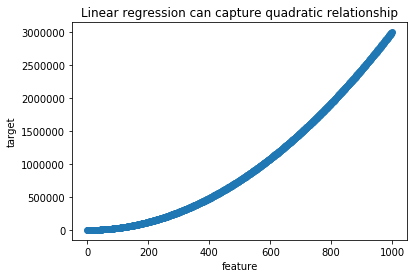

In [410]:
df = pd.DataFrame()

# data from 0 to 999
df["X1"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = df["X1"]**2

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y1"] = 1 + 2*df["X1"] + 3*df["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X1","X_sq"]],df["Y1"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X1","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X1"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

obs:


In [411]:
predictions = lrm.predict(X1)
errors = Y1 - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.5416016323517448e-11


OBS:

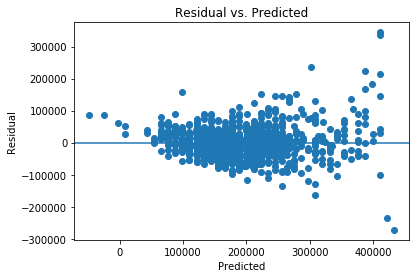

In [412]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

OBS:

In [413]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 283.849 and p value is 1.09e-63
Levene test statistic value is 225.204 and p value is 4.29e-49


OBS:

In [414]:
X1 = sm.add_constant(X1)

results = sm.OLS(Y1, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:00   Log-Likelihood:                -17640.
No. Observations:                1460   AIC:                         3.529e+04
Df Residuals:                    1456   BIC:                         3.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.037e+05   6190.616    -16.750      0.000   -1.16e+05   -9.15e+04
overallqual   3.385e+04    987.309     34.288      0.000    3.19e+04    3.58e+04
totrmsabvgrd  1.118e+04    763.580     14.641      0.000    9681.437    1.27e+04
bsmtqual_Ex   6.355e+04   4611.357     13.782      0.000    5.45e+04    7.26e+04
==============================================================================
Omnibus:                      430.976   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5348.327
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                      12.156   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBS:

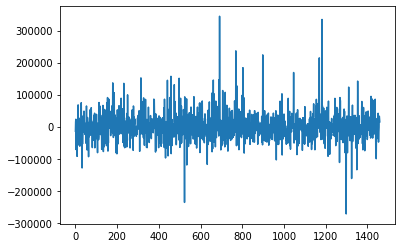

In [415]:
plt.plot(errors)
plt.show()

OBS:

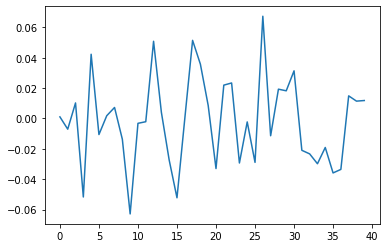

In [416]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

OBS:

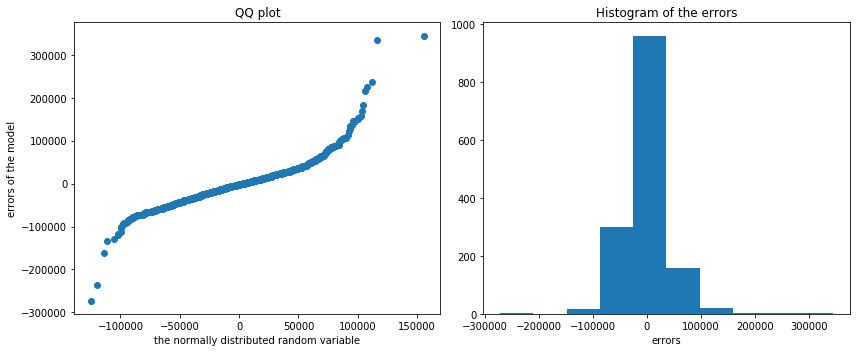

In [417]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

OBS:

In [418]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 5348.327352566483 and p value is 0.0
Normality test statistics is 430.9760559179871 and p value is 2.598594657232604e-94


OBS:

### Section 3:
Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

Now, exclude the insignificant features from your model. Did anything change?

Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?

Do the results sound reasonable to you? If not, try to explain the potential reasons.



## Section 4:
- Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
- Do you think your model is satisfactory? If so, why?
- In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.
- For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [419]:
Y1 = houses_c['saleprice']
# X is the feature set which includes
# overallqual, totrmsabvgrd, and bsntqual_Ex
X1 = houses_c[["overallqual",  "totrmsabvgrd", "bsmtqual_Ex"]]

# We add a constant to the model as it's a best practice
# to do so every time!
X1 = sm.add_constant(X1)

# We fit an OLS model using statsmodels
results = sm.OLS(Y1, X1).fit()

# We print the summary results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                -17640.
No. Observations:                1460   AIC:                         3.529e+04
Df Residuals:                    1456   BIC:                         3.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.037e+05   6190.616    -16.750      0.000   -1.16e+05   -9.15e+04
overallqual   3.385e+04    987.309     34.288      0.000    3.19e+04    3.58e+04
totrmsabvgrd  1.118e+04    763.580     14.641      0.000    9681.437    1.27e+04
bsmtqual_Ex   6.355e+04   4611.357     13.782      0.000    5.45e+04    7.26e+04
==============================================================================
Omnibus:                      430.976   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5348.327
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                      12.156   Cond. No.                         54.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBS:
- Equation for the house price is,

price = -1.037e+05 + 3.385e+04	overallqual + 1.118e+04 totrmsabvgrd + 6.355e+04 bsmtqual_Ex - controlled experiment
- From above, we can see that, for higher quality price will increase by 3.385 e+04, for every room above ground price increases by 1.118e+04, and for higher quality of basement price increases by  6.355e+04, whcih is the highest among other variables.
- p-value of all the variables is around 0, which means they all are statistically significant to target.
- As t-value is higher for overallquality, which means the differences is higher for this variable than other two.
- Standard error high for all.
- Model is highly skewed.

OBS 2:

- Here R2 = 0.710, Adjusted R2 = 0.710.
- F-statistic: 1190 and p- value is 0.
- AIC: 3.529e+04
- BIC: 3.531e+04
- AIC and BIC lower the better, which looks high.

#### Checking for an Interaction terms:
We can make interaction between totrmsabvgrd and bsmtwual_Ex to see if house price is increasing because of total rooms above ground and basement quality.

In [420]:
Y1 = houses_c['saleprice']

houses_c['totrmsabvgrd_bsmtqual'] = houses_c['totrmsabvgrd'] * houses_c['bsmtqual_Ex']
# X is the feature set which includes
# overallqual, totrmsabvgrd, and bsntqual_Ex
X2 = houses_c[["overallqual",  "totrmsabvgrd", "bsmtqual_Ex", "totrmsabvgrd_bsmtqual"]]

# We add a constant to the model as it's a best practice
# to do so every time!
X2 = sm.add_constant(X2)

# We fit an OLS model using statsmodels
results = sm.OLS(Y1, X2).fit()

# We print the summary results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     919.4
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                -17624.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1455   BIC:                         3.528e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.503e+04   6313.569    -15.051      0.000   -1.07e+05   -8.26e+04
overallqual            3.385e+04    976.927     34.652      0.000    3.19e+04    3.58e+04
totrmsabvgrd           9825.9069    792.397     12.400      0.000    8271.544    1.14e+04
bsmtqual_Ex           -3.674e+04   1.83e+04     -2.010      0.045   -7.26e+04    -885.502
totrmsabvgrd_bsmtqual  1.307e+04   2307.001      5.667      0.000    8547.879    1.76e+04
==============================================================================
Omnibus:                      338.404   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5229.716
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                      12.183   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBS:
- New equation for houses price is:
   
   **price** = -9.503e+04 + 3.385e+04 overallqual	+ 9825.9069 totrmsabvgrd + -3.674e+04 bsmtqual_Ex + 1.307e+04 totrmsabvgrd_bsmtqual
- Now, price decrease for quality of basement but increases for house with higher room above ground and basement higher quality.
- t value is lower for new variable, which means it is more close to target than the previous one. 
- p-value is 0 for all but bsmtqual_Ex.
- skewness went little down tahn before.
- std error is high.

OBS:

- Here R2 = 0.717, Adjusted R2 = 0.716, which higher than first model.
- F-statistic: 919.4 and p- value around 0/ lower than 0.05.
- AIC: 3.526e+04
- BIC: 3.528e+04
- AIC and BIC lower the better, which is lower than first model.

#### Changing interaction terms:
Will use overallqual and totrmsabvgrd

In [421]:
Y1 = houses_c['saleprice']

houses_c['totrmsabvgrd_overallqual'] = houses_c['totrmsabvgrd'] * houses_c['overallqual']
# X is the feature set which includes
# overallqual, totrmsabvgrd, and bsntqual_Ex
X3 = houses_c[["overallqual",  "totrmsabvgrd", "bsmtqual_Ex", "totrmsabvgrd_overallqual"]]

# We add a constant to the model as it's a best practice
# to do so every time!
X3 = sm.add_constant(X3)

# We fit an OLS model using statsmodels
results = sm.OLS(Y1, X3).fit()

# We print the summary results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     991.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                -17584.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1455   BIC:                         3.520e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.598e+04   1.78e+04      4.273      0.000    4.11e+04    1.11e+05
overallqual               4335.2370   2911.903      1.489      0.137   -1376.739       1e+04
totrmsabvgrd             -1.692e+04   2721.020     -6.217      0.000   -2.23e+04   -1.16e+04
bsmtqual_Ex               5.058e+04   4602.414     10.991      0.000    4.16e+04    5.96e+04
totrmsabvgrd_overallqual  4533.2312    422.684     10.725      0.000    3704.096    5362.367
==============================================================================
Omnibus:                      288.026   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6310.601
Skew:                           0.287   Prob(JB):                         0.00
Kurtosis:                      13.169   Cond. No.                         757.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OBS:
- t value is really low for overallqual than interaction of totrmsabvgrd and overallqual.
- p value is 0 for all but overallqual which is 0.137.

OBS:

- Here R2 = 0.731, Adjusted R2 = 0.731, which higher than first and second model.
- F-statistic: 991.0.
- AIC: 3.518e+04
- BIC: 3.520e+04
- AIC and BIC lower the better, which is lower than first and second model.

OBS:
- From all the results, we can see than third model looks better than other two, because of higher Adjusted R2, and lower AIC and BIC.

## Section 5:
- Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
- Is the performance of your model satisfactory? Why?
- Try to improve your model in terms of predictive performance by adding or removing some variables.

### Evaluation metrics: Improving the model:
- Using MAE, MSE, RMSE, MAPE.

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X3, Y1, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [424]:
X_train.head()

,const,overallqual,totrmsabvgrd,bsmtqual_Ex,totrmsabvgrd_overallqual
151,1.0,5,5,0,25
262,1.0,8,10,1,80
1037,1.0,8,7,0,56
1183,1.0,5,5,0,25
933,1.0,7,6,0,42


We add a constant to the model, the “baseline” of the data in case all of your features values are 0.

In [425]:
X_train = sm.add_constant(X_train)

Training the model:

In [426]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     789.6
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:01   Log-Likelihood:                -14059.
No. Observations:                1168   AIC:                         2.813e+04
Df Residuals:                    1163   BIC:                         2.815e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

OBS:

Making prediction by using predict() function:

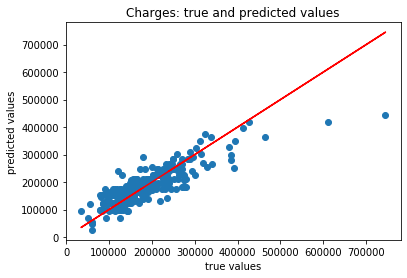

R-squared of the model in the training set is: 0.7308652241267195
-----Test set statistics-----
R-squared of the model in the test set is: 0.7297650479383653
Mean absolute error of the prediction is: 29490.944061326296
Mean squared error of the prediction is: 1814277499.9644077
Root mean squared error of the prediction is: 42594.3364775695
Mean absolute percentage error of the prediction is: 18.062164674601192


In [427]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



OBS:
- we see that our model predicts the lower values of the target better than the higher values.


This model looks better as values are more towards red line and R squared of the model looks almost same.


## Section 6:
- Reimplement your model from the previous checkpoint.
- Try OLS, Lasso, Ridge, and ElasticNet regression using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Scikit-learn has RidgeCV, LassoCV, and ElasticNetCV that you can utilize to do this. Which model is the best? Why?

### Overfitting and regularization:

#### Ridge regression: to deal with the overfitting:


In [476]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

alphas = [1e-6, 1e-3, 1e-1, 0, 0.1, 1, 5, 1e3, 1e4,1e6]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1.0
R-squared of the model in training set is: 0.7308615921575055
-----Test set statistics-----
R-squared of the model in test set is: 0.7293654478634161
Mean absolute error of the prediction is: 29510.42762515024
Mean squared error of the prediction is: 1816960296.6175916
Root mean squared error of the prediction is: 42625.81725454178
Mean absolute percentage error of the prediction is: 18.07179872032408


OBS:


#### Lasso regression:

In [477]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 5.0
R-squared of the model in training set is: 0.730865159526936
-----Test set statistics-----
R-squared of the model in test set is: 0.7297111024129315
Mean absolute error of the prediction is: 29493.07417340767
Mean squared error of the prediction is: 1814639674.2585588
Root mean squared error of the prediction is: 42598.587702628814
Mean absolute percentage error of the prediction is: 18.06298779120847


OBS:

#### ElasticNet regression:

In [478]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.7308639699745316
-----Test set statistics-----
R-squared of the model in test set is: 0.7295311235512595
Mean absolute error of the prediction is: 29502.06673247922
Mean squared error of the prediction is: 1815847999.0763142
Root mean squared error of the prediction is: 42612.76802879994
Mean absolute percentage error of the prediction is: 18.067707899998915


OBS:
From all the regularization parameters, OLS, lasso and ridge, OLS got higher R squared of the model in test, so It is better than others.